In [1]:
import time
import matplotlib.pyplot as plt

In [2]:
# Given sets and targets
sets = [
    [2, 4, 6, 8, 9, 9, 9, 10, 12, 14, 16, 18, 20, 22, 24],
    [3, 3, 5, 7, 9, 11, 12, 12, 12, 13, 15, 17, 19, 21, 23],
    [3, 4, 6, 6, 9, 11, 11, 12, 15, 17, 17, 17, 18, 21, 21, 24],
    [2, 3, 4, 7, 11, 11, 12, 13, 13, 14, 14, 16, 19, 21, 22, 24]
]
targets = [140, 165, 182]

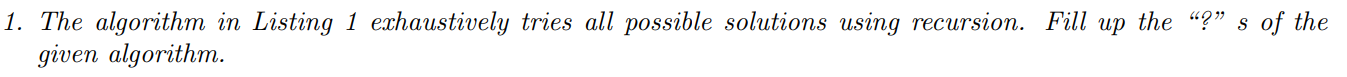

In [3]:
def is_subset_sum_recursive(arr, n, target, subset=[]):
    # Base Cases
    if target == 0:
        print("Subset with the given sum exists:", subset)
        return True

    if n == 0 and target != 0:
        return False

    # If last element is greater than target, ignore it
    if arr[n - 1] > target:
        return is_subset_sum_recursive(arr, n - 1, target, subset)

    # Check if sum can be obtained by including the last element or excluding it
    return is_subset_sum_recursive(arr, n - 1, target, subset) or \
           is_subset_sum_recursive(arr, n - 1, target - arr[n - 1], subset + [arr[n - 1]])

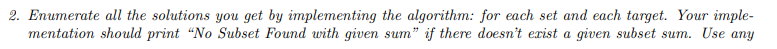






image.png

In [4]:
recursive_times_list = []

# Check subset sum for each set with corresponding targets using the recursive approach
for i, s in enumerate(sets):
    print("Set", i + 1)
    for target in targets:
        print("Target:", target)
        start_time = time.time()
        result = is_subset_sum_recursive(s, len(s), target)
        end_time = time.time()
        if not result:
            print("No Subset Found with given sum")
        print("Time taken:", end_time - start_time, "seconds")
        recursive_times_list.append(end_time - start_time)
        print()

Set 1
Target: 140
Subset with the given sum exists: [22, 20, 18, 16, 14, 12, 9, 9, 8, 6, 4, 2]
Time taken: 0.02427983283996582 seconds

Target: 165
Subset with the given sum exists: [24, 22, 20, 16, 14, 12, 10, 9, 9, 9, 8, 6, 4, 2]
Time taken: 0.041033267974853516 seconds

Target: 182
No Subset Found with given sum
Time taken: 0.038810014724731445 seconds

Set 2
Target: 140
Subset with the given sum exists: [21, 17, 15, 13, 12, 12, 12, 11, 9, 7, 5, 3, 3]
Time taken: 0.01810622215270996 seconds

Target: 165
Subset with the given sum exists: [23, 21, 19, 15, 13, 12, 12, 12, 11, 9, 7, 5, 3, 3]
Time taken: 0.03801584243774414 seconds

Target: 182
Subset with the given sum exists: [23, 21, 19, 17, 15, 13, 12, 12, 12, 11, 9, 7, 5, 3, 3]
Time taken: 0.052640438079833984 seconds

Set 3
Target: 140
Subset with the given sum exists: [18, 17, 17, 17, 15, 12, 11, 11, 9, 6, 4, 3]
Time taken: 0.013362407684326172 seconds

Target: 165
Subset with the given sum exists: [21, 21, 18, 17, 17, 15, 12, 11,

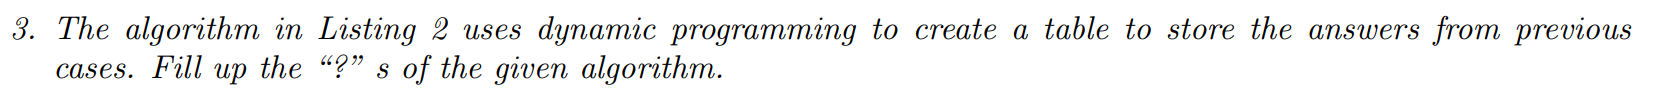

In [5]:
def subset_sum(numbers, target_sum):
    n = len(numbers)
    # Create a 2D table to store the results of subproblems
    dp = [[False] * (target_sum + 1) for _ in range(n + 1)]
    # Base case initialization (when sum is 0)
    for i in range(n + 1):
        dp[i][0] = True
    # Fill the dp table
    for i in range(1, n + 1):
        for j in range(1, target_sum + 1):
            # If the current number is greater than the target sum,
            # then the current number cannot be included in the subset
            if numbers[i - 1] > j:
                dp[i][j] = dp[i - 1][j]
            else:
                # Check if it's possible to achieve the target sum
                # by either including or excluding the current number
                dp[i][j] = dp[i - 1][j] or dp[i - 1][j - numbers[i - 1]]
    # Trace back to find the elements included in the subset sum
    subset = []
    i, j = n, target_sum
    while i > 0 and j > 0:
        if dp[i][j] != dp[i - 1][j]:
            subset.append(numbers[i - 1])
            j -= numbers[i - 1]
        i -= 1
    return dp[n][target_sum], subset[::-1]

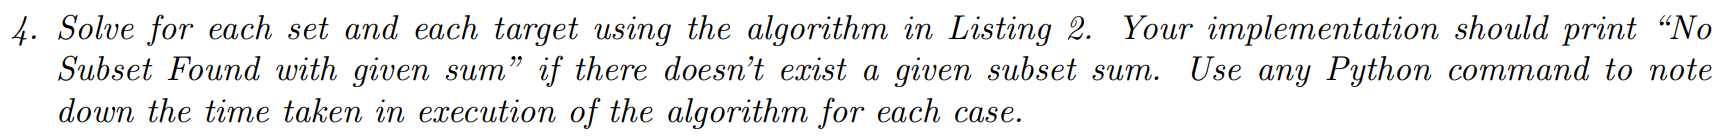

In [6]:
dynamic_programming_times_list = []

# Check subset sum for each set with corresponding targets using dynamic programming
for i, s in enumerate(sets):
    print("Set", i + 1)
    for target in targets:
        print("Target:", target)
        start_time = time.time()
        result, subset = subset_sum(s, target)
        end_time = time.time()
        if result:
            print("Subset with the given sum exists:", subset)
        else:
            print("No Subset Found with given sum")
        print("Time taken:", end_time - start_time, "seconds")
        dynamic_programming_times_list.append(end_time - start_time)
        print()

Set 1
Target: 140
Subset with the given sum exists: [2, 4, 6, 8, 9, 9, 12, 14, 16, 18, 20, 22]
Time taken: 0.0009250640869140625 seconds

Target: 165
Subset with the given sum exists: [2, 4, 6, 8, 9, 9, 9, 10, 12, 14, 16, 20, 22, 24]
Time taken: 0.0036661624908447266 seconds

Target: 182
No Subset Found with given sum
Time taken: 0.0012638568878173828 seconds

Set 2
Target: 140
Subset with the given sum exists: [3, 3, 5, 7, 9, 11, 12, 12, 12, 13, 15, 17, 21]
Time taken: 0.0008661746978759766 seconds

Target: 165
Subset with the given sum exists: [3, 3, 5, 7, 9, 11, 12, 12, 12, 13, 15, 19, 21, 23]
Time taken: 0.0011296272277832031 seconds

Target: 182
Subset with the given sum exists: [3, 3, 5, 7, 9, 11, 12, 12, 12, 13, 15, 17, 19, 21, 23]
Time taken: 0.0012562274932861328 seconds

Set 3
Target: 140
Subset with the given sum exists: [3, 4, 6, 9, 11, 11, 12, 15, 17, 17, 17, 18]
Time taken: 0.0009379386901855469 seconds

Target: 165
Subset with the given sum exists: [3, 4, 6, 9, 11, 11, 1

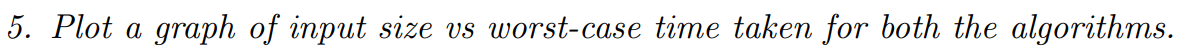

In [7]:
min_recursive_times_list = []
for i, s in enumerate(sets):
    min_recursive_time = max(recursive_times_list[i * len(targets): (i + 1) * len(targets)])
    min_recursive_times_list.extend([min_recursive_time])

min_dynamic_programming_times_list = []
for i, s in enumerate(sets):
    min_recursive_time = max(dynamic_programming_times_list[i * len(targets): (i + 1) * len(targets)])
    min_dynamic_programming_times_list.extend([min_recursive_time])

In [8]:
def calculate_input_size(arr):
    return sum(len(str(num)) for num in arr) + 5

def calculate_input_size_2(arr):
    return sum(len(str(num)) for num in arr) + 3

input_sizes = []
input_sizes_2 = []

for s in sets:
  input_sizes.append(calculate_input_size(s))
  input_sizes_2.append(calculate_input_size_2(s))

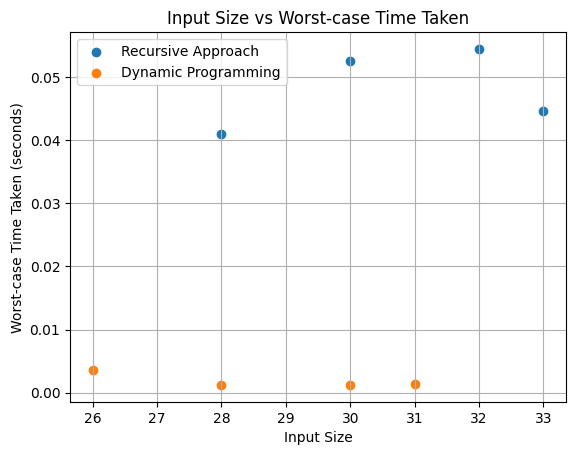

In [9]:
import numpy as np
plt.scatter(input_sizes, min_recursive_times_list, label="Recursive Approach")
plt.scatter(input_sizes_2 , min_dynamic_programming_times_list, label="Dynamic Programming")
plt.xlabel("Input Size")
plt.ylabel("Worst-case Time Taken (seconds)")
plt.title("Input Size vs Worst-case Time Taken")
plt.legend()
plt.grid(True)
plt.show()